In [2]:
from fastai.vision.all import *
from duckduckgo_search  import DDGS
from fastdownload import download_url
from time import sleep
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# Things to learn
- [x] Effect of higher models on training time, accuracy and model size
- [ ] Review highest loss causing images
- [ ] GradCam to see attention maps of different models for reliability and explainability
- [ ] Early stopping criteria
- [ ] training with loss functions
- [ ] Open up the model to do everything as API which fastai claims

In [3]:
def search_images(term, max_images= 30):
    results = DDGS().images(keywords= term)
    counter=0
    search_results = []
    for r in results:
        search_results.append(r)
        counter+=1
        if counter==max_images:
            break
    return L(search_results).itemgot('image')

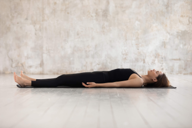

In [17]:
shavasana_url = search_images('shavasana', max_images=1)
dest_img = Path('shavasana.jpg')
download_url(shavasana_url[0], dest_img, show_progress=False)

im = Image.open(dest_img)
im.to_thumb(192,192)



In [12]:
?download_url

In [19]:
yoga_asanas = [
    "Tadasana (Mountain Pose)",
    "Vrikshasana (Tree Pose)",
    "Uttanasana (Forward Bend Pose)",
    "Adho Mukha Svanasana (Downward-Facing Dog Pose)",
    "Balasana (Child's Pose)",
    "Bhujangasana (Cobra Pose)",
    "Virabhadrasana I (Warrior Pose I)",
    "Virabhadrasana II (Warrior Pose II)",
    "Utthita Trikonasana (Extended Triangle Pose)",
    "Utkatasana (Chair Pose)",
    "Dhanurasana (Bow Pose)",
    "Setu Bandhasana (Bridge Pose)",
    "Ardha Matsyendrasana (Half Lord of the Fishes Pose)",
    "Savasana (Corpse Pose)",
    "Garudasana (Eagle Pose)",
    "Marjaryasana (Cat Pose)",
    "Bitilasana (Cow Pose)",
    "Navasana (Boat Pose)",
    "Paschimottanasana (Seated Forward Bend Pose)",
    "Halasana (Plow Pose)",
    "Salamba Sarvangasana (Shoulder Stand Pose)",
    "Salamba Sirsasana (Headstand Pose)",
    "Kumbhakasana (Plank Pose)",
    "Ardha Chandrasana (Half Moon Pose)",
    "Natarajasana (Lord of the Dance Pose)",
    "Malasana (Garland Pose)",
    "Ananda Balasana (Happy Baby Pose)",
    "Baddha Konasana (Butterfly Pose)",
    "Utthita Parsvakonasana (Extended Side Angle Pose)",
    "Parivrtta Trikonasana (Revolved Triangle Pose)",
    "Virabhadrasana III (Warrior Pose III)",
    "Sirsasana (Headstand Pose)",
    "Prasarita Padottanasana (Wide-Legged Forward Bend Pose)",
    "Parsvottanasana (Intense Side Stretch Pose)",
    "Ardha Pincha Mayurasana (Dolphin Pose)",
    "Pincha Mayurasana (Forearm Stand Pose)",
    "Garbha Pindasana (Embryo in the Womb Pose)",
    "Gomukhasana (Cow Face Pose)",
    "Simhasana (Lion Pose)",
    "Ardha Uttanasana (Half Forward Bend Pose)",
    "Ardha Bhekasana (Half Frog Pose)",
    "Ardha Matsyendrasana (Sitting Half Spinal Twist)",
    "Kapotasana (Pigeon Pose)",
    "Hanumanasana (Monkey Pose)",
    "Upavistha Konasana (Wide-Angle Seated Forward Bend Pose)",
    "Bakasana (Crow Pose)",
    "Salamba Bhujangasana (Sphinx Pose)",
    "Salamba Balasana (Supported Child's Pose)",
    "Makarasana (Crocodile Pose)",
    "Supta Baddha Konasana (Reclining Bound Angle Pose)",
    "Eka Pada Rajakapotasana (One-Legged King Pigeon Pose)",
    "Parivrtta Parsvakonasana (Revolved Side Angle Pose)"
]

print(len(yoga_asanas))


52


In [4]:
path = Path('yoga_asanas')

## Commented to avoid running it and downloading data again
# for pose in yoga_asanas:
#     dest = (path/pose)
#     print(dest)
#     dest.mkdir(exist_ok= True, parents = True)
#     download_images(dest, urls = search_images(f'{pose} photo', 40))
#     sleep(5)a
#     download_images(dest, urls= search_images(f'{pose} side view photo',40))
#     sleep(5)
#     download_images(dest, urls= search_images(f'{pose} top view photo', 40))
#     sleep(5)
#     download_images(dest, urls= search_images(f'{pose} front view photo', 40))
#     sleep(5)
#     resize_images(path/pose, max_size=300, dest=path/pose)

In [10]:
# remove broken files
failed = verify_images(get_image_files(path)) # input is path to image files
failed.map(Path.unlink)
len(failed)

154

In [11]:
# for developing dataloader functions
# sample image
parent_label(get_image_files(path)[0])

'Adho Mukha Svanasana (Downward-Facing Dog Pose)'

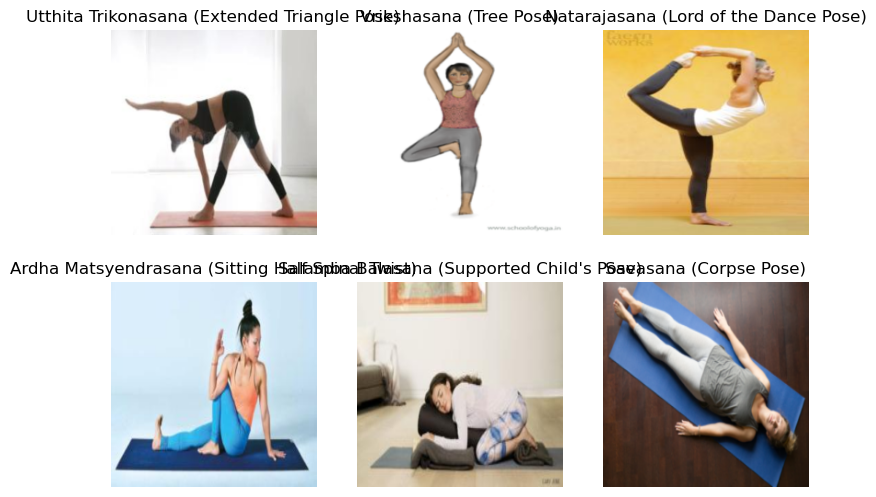

In [12]:
# create dataloader to load these images

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.804558,1.433887,0.364100,00:39


epoch,train_loss,valid_loss,error_rate,time
0,1.082240,0.714039,0.186304,00:35
1,0.528752,0.486388,0.120800,00:35
2,0.237932,0.469057,0.118673,00:35
3,0.126556,0.441487,0.114419,00:34


In [16]:
# since error rate has been high, we are further finetuning
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.177857,0.534497,0.117397,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.193550,0.532901,0.110591,00:35
1,0.242734,0.511152,0.114845,00:35
2,0.128286,0.443171,0.100808,00:35
3,0.081245,0.432056,0.101234,00:34


In [18]:
print(len(learn.dls.vocab), '\n' , learn.dls.vocab)

52 
 ['Adho Mukha Svanasana (Downward-Facing Dog Pose)', 'Ananda Balasana (Happy Baby Pose)', 'Ardha Bhekasana (Half Frog Pose)', 'Ardha Chandrasana (Half Moon Pose)', 'Ardha Matsyendrasana (Half Lord of the Fishes Pose)', 'Ardha Matsyendrasana (Sitting Half Spinal Twist)', 'Ardha Pincha Mayurasana (Dolphin Pose)', 'Ardha Uttanasana (Half Forward Bend Pose)', 'Baddha Konasana (Butterfly Pose)', 'Bakasana (Crow Pose)', "Balasana (Child's Pose)", 'Bhujangasana (Cobra Pose)', 'Bitilasana (Cow Pose)', 'Dhanurasana (Bow Pose)', 'Eka Pada Rajakapotasana (One-Legged King Pigeon Pose)', 'Garbha Pindasana (Embryo in the Womb Pose)', 'Garudasana (Eagle Pose)', 'Gomukhasana (Cow Face Pose)', 'Halasana (Plow Pose)', 'Hanumanasana (Monkey Pose)', 'Kapotasana (Pigeon Pose)', 'Kumbhakasana (Plank Pose)', 'Makarasana (Crocodile Pose)', 'Malasana (Garland Pose)', 'Marjaryasana (Cat Pose)', 'Natarajasana (Lord of the Dance Pose)', 'Navasana (Boat Pose)', 'Parivrtta Parsvakonasana (Revolved Side Angle Po

In [22]:
learn.export('yogapose52_18.pkl') #52_18 # 52-> classes , 18-> resnet18 

In [ ]:
# Let's see if bigger model has better accuracy


In [21]:
learn2 = vision_learner(dls, resnet50, metrics = error_rate)
learn2.fine_tune(8)

C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.278237,1.225750,0.316461,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.735525,0.565531,0.142493,00:50
1,0.568263,0.578608,0.140791,00:50
2,0.404309,0.530728,0.119949,00:50
3,0.227672,0.458814,0.102510,00:50
4,0.145667,0.442759,0.093577,00:50
5,0.098276,0.403106,0.091450,00:52
6,0.076556,0.384227,0.091450,00:51
7,0.051432,0.383334,0.091876,00:51


In [23]:
learn2.export('yogapose52_50.pkl')

In [15]:
doc(vision_learner)

In [24]:
?download_images

In [30]:
??resize_images

In [29]:
?get_image_files

'Adho Mukha Svanasana (Downward-Facing Dog Pose)'